In [2]:
import pandas as pd



path = '/kaggle/input/duhacks'

# Loading the datasets (ensure filenames match exactly)
train_df = pd.read_csv('/kaggle/input/duhacks/exoTrain.csv')
test_df = pd.read_csv( '/kaggle/input/duhacks/exoTest.csv')

print(f"Dataset Loaded: {train_df.shape[0]} stars found.")

Dataset Loaded: 5087 stars found.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras import layers, models

# 1. Load Data (Assumes files from your Drive are locally accessible or in Colab)
# train = pd.read_csv('/content/drive/MyDrive/exoTrain.csv')
# test = pd.read_csv('/content/drive/MyDrive/exoTest.csv')

def preprocess_data(df):
    # Separate features and labels
    x = df.drop('LABEL', axis=1)
    y = df['LABEL'] - 1  # Convert labels 1,2 to 0,1

    # Normalize features (Standardization)
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)

    return x_scaled, y

x_train, y_train = preprocess_data(train_df)
x_test, y_test = preprocess_data(test_df)

# 2. Address Imbalance using SMOTE
smote = SMOTE(sampling_strategy='minority')
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

# Reshape for 1D CNN: (samples, time_steps, features)
x_train_res = np.reshape(x_train_res, (x_train_res.shape[0], x_train_res.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# 3. Build the 1D CNN Architecture
model = models.Sequential([
    layers.Conv1D(filters=32, kernel_size=10, activation='relu', input_shape=(x_train_res.shape[1], 1)),
    layers.MaxPooling1D(pool_size=4),
    layers.BatchNormalization(),

    layers.Conv1D(filters=64, kernel_size=10, activation='relu'),
    layers.MaxPooling1D(pool_size=4),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 4. Train the Model
history = model.fit(x_train_res, y_train_res, epochs=20, batch_size=64, validation_data=(x_test, y_test))

# 5. Evaluate Performance
y_pred = (model.predict(x_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

2026-01-25 09:38:16.647811: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1769333897.081329      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1769333897.205108      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1769333898.119686      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769333898.119716      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769333898.119718      55 computation_placer.cc:177] computation placer alr

Epoch 1/20


I0000 00:00:1769333919.425551     125 service.cc:152] XLA service 0x7d6a6000c6e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1769333919.425602     125 service.cc:160]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1769333919.917260     125 cuda_dnn.cc:529] Loaded cuDNN version 91002


  7/158 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.4783 - loss: 0.9740

I0000 00:00:1769333923.670439     125 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


158/158 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - accuracy: 0.5982 - loss: 0.6898 - val_accuracy: 0.9912 - val_loss: 0.3539
Epoch 2/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.7844 - loss: 0.4665 - val_accuracy: 0.9895 - val_loss: 0.2368
Epoch 3/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9140 - loss: 0.2681 - val_accuracy: 0.9895 - val_loss: 0.1480
Epoch 4/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9346 - loss: 0.2000 - val_accuracy: 0.9895 - val_loss: 0.1698
Epoch 5/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9503 - loss: 0.1785 - val_accuracy: 0.9368 - val_loss: 0.3463
Epoch 6/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9120 - loss: 0.2491 - val_accuracy: 0.9825 - val_loss: 0.2263
Epoch 7/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9692 - loss: 0.1171 - val_accuracy: 0.9895 - val_loss: 0.2146
Epoch 8/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9882 - loss: 0.0800 - val_accuracy: 0.99

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/30
316/316 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.6512 - loss: 22.4564 - val_accuracy: 0.9912 - val_loss: 0.3811
Epoch 2/30
316/316 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6012 - loss: 3.8634 - val_accuracy: 0.9877 - val_loss: 0.3969
Epoch 3/30
316/316 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6337 - loss: 1.3815 - val_accuracy: 0.9807 - val_loss: 0.4510
Epoch 4/30
316/316 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6265 - loss: 1.5650 - val_accuracy: 0.9789 - val_loss: 0.5053
Epoch 5/30
316/316 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6224 - loss: 1.4155 - val_accuracy: 0.9421 - val_loss: 0.8386
Epoch 6/30
316/316 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6739 - loss: 0.7797 - val_accuracy: 0.9860 - val_loss: 0.6060
Epoch 7/30
316/316 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7272 - loss: 0.6185 - val_accuracy: 0.9877 - val_loss: 0.9640
Epoch 8/30
316/316 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7620 - loss: 0.4924 - val_ac

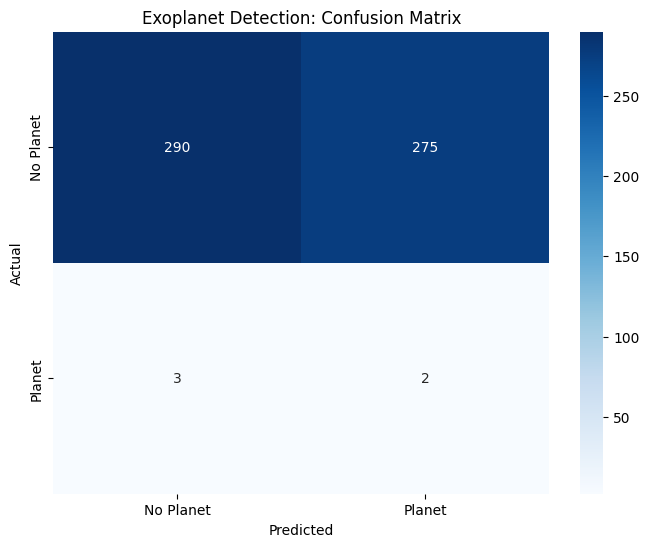

              precision    recall  f1-score   support

           0       0.99      0.51      0.68       565
           1       0.01      0.40      0.01         5

    accuracy                           0.51       570
   macro avg       0.50      0.46      0.35       570
weighted avg       0.98      0.51      0.67       570



In [4]:
from sklearn.utils import class_weight
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# 1. Calculate Class Weights
# This tells the model to pay much more attention to the 'Planet' class (1)
weights = class_weight.compute_class_weight('balanced',
                                            classes=np.unique(y_train),
                                            y=y_train)
class_weights_dict = {0: weights[0], 1: weights[1]}

# 2. Retrain with Weights (using the 1D CNN from earlier)
history = model.fit(x_train_res, y_train_res,
                    epochs=30,
                    batch_size=32,
                    validation_data=(x_test, y_test),
                    class_weight=class_weights_dict, # CRITICAL ADDITION
                    verbose=1)

# 3. Evaluate with a Confusion Matrix
y_pred = (model.predict(x_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Planet', 'Planet'],
            yticklabels=['No Planet', 'Planet'])
plt.title('Exoplanet Detection: Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(classification_report(y_test, y_pred))

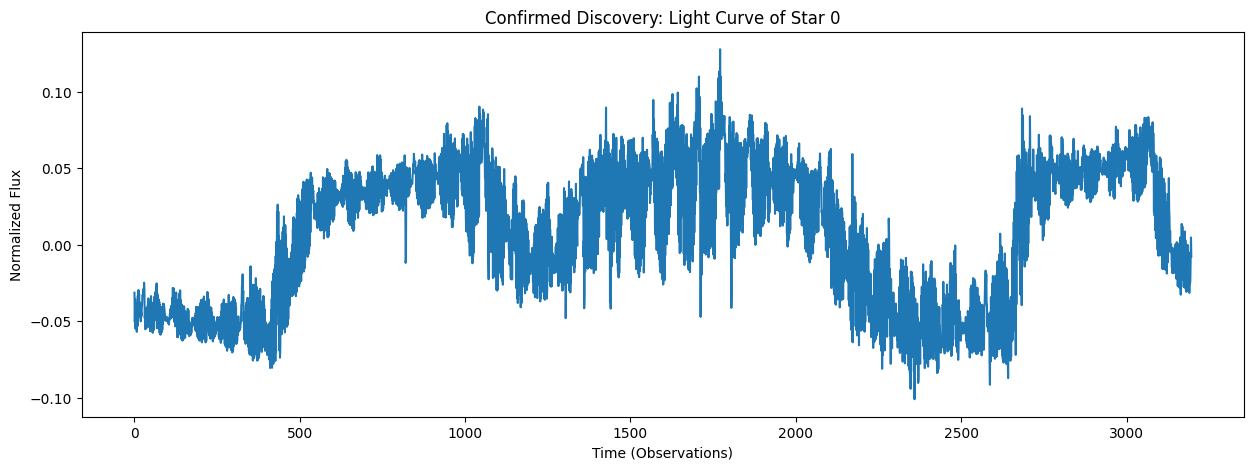

In [5]:
# Find indices where the model correctly predicted a planet
correct_planet_indices = np.where((y_pred.flatten() == 1) & (y_test.values == 1))[0]

if len(correct_planet_indices) > 0:
    idx = correct_planet_indices[0]
    plt.figure(figsize=(15,5))
    plt.plot(x_test[idx])
    plt.title(f"Confirmed Discovery: Light Curve of Star {idx}")
    plt.xlabel("Time (Observations)")
    plt.ylabel("Normalized Flux")
    plt.show()
else:
    print("No planets detected yet. Try increasing epochs or adjusting class weights.")

In [6]:
from scipy.ndimage import gaussian_filter1d
from scipy.fft import fft

def advanced_processing(df):
    # 1. Separate Labels
    x = df.drop('LABEL', axis=1)
    y = df['LABEL'] - 1

    # 2. Gaussian Smoothing (Removes 'spikes')
    x_smooth = gaussian_filter1d(x, sigma=2, axis=1)

    # 3. Standardization (Makes brightness comparable)
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x_smooth)

    # 4. FFT (Extracts periodic patterns)
    x_fft = np.abs(fft(x_scaled, axis=1))

    # Combine Scaled Data and FFT Data for a 'Dual-Input' feel
    # This gives the model two ways to see the planet
    return x_scaled, x_fft, y

# Apply it
x_train_scaled, x_train_fft, y_train = advanced_processing(train_df)

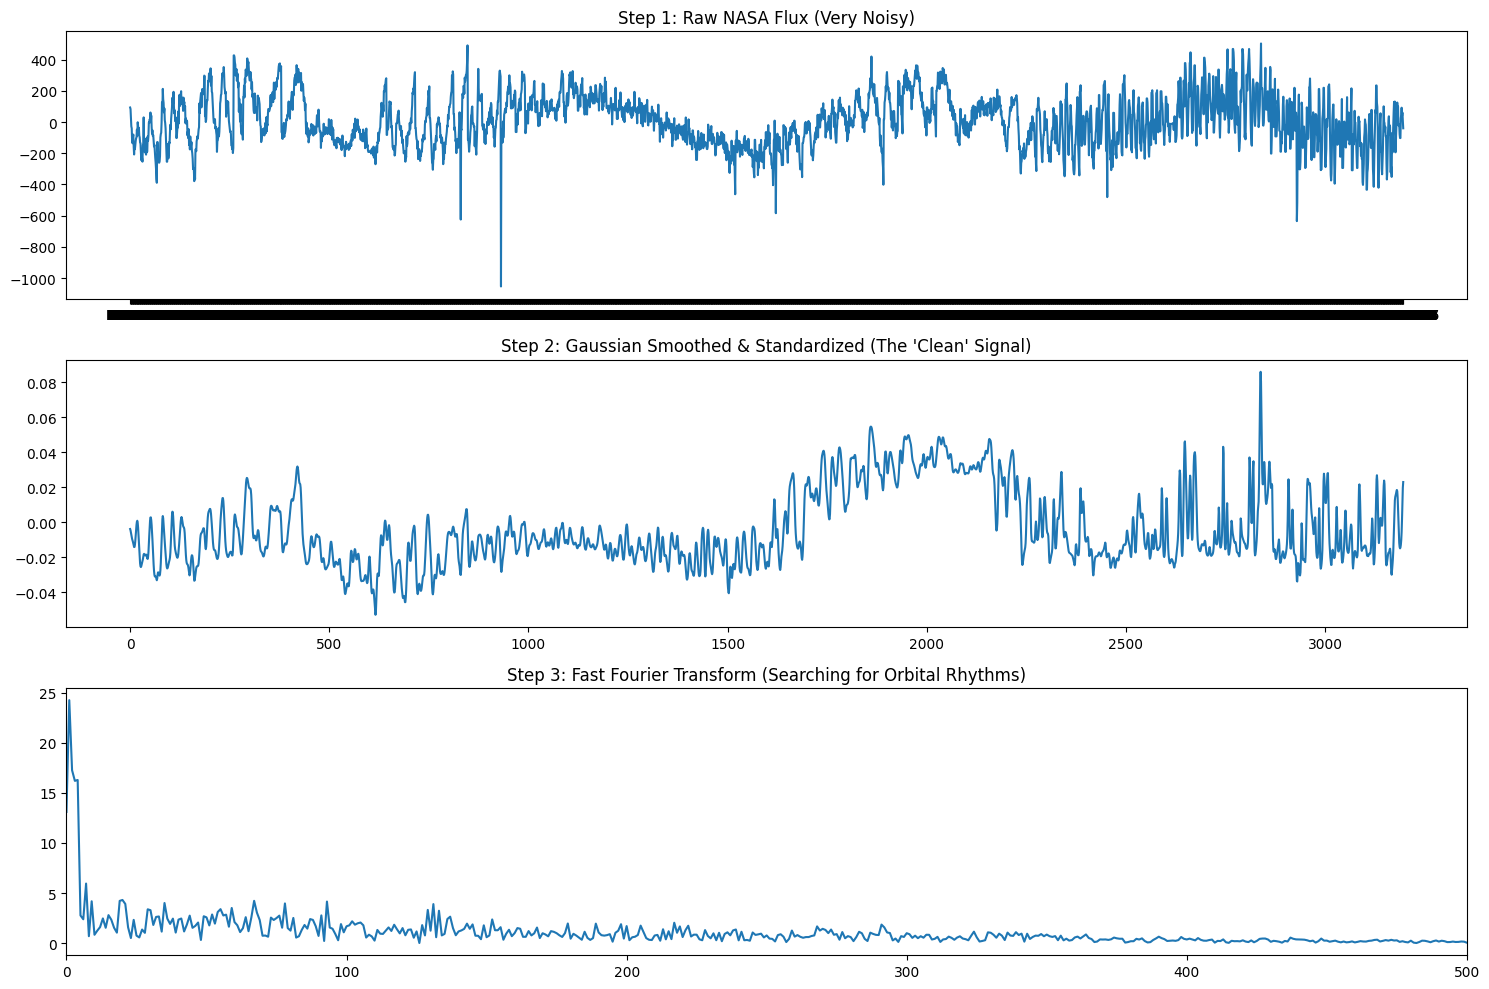

Processed features shape: (5087, 3197)
FFT features shape: (5087, 3197)


In [7]:
import matplotlib.pyplot as plt

# Choose a star to inspect (e.g., index 0)
star_idx = 0

plt.figure(figsize=(15, 10))

# Plot 1: Raw Data (Original)
plt.subplot(3, 1, 1)
plt.plot(train_df.iloc[star_idx, 1:])
plt.title("Step 1: Raw NASA Flux (Very Noisy)")

# Plot 2: Scaled & Smoothed Data
plt.subplot(3, 1, 2)
plt.plot(x_train_scaled[star_idx])
plt.title("Step 2: Gaussian Smoothed & Standardized (The 'Clean' Signal)")

# Plot 3: FFT (Frequency Domain)
plt.subplot(3, 1, 3)
plt.plot(x_train_fft[star_idx])
plt.title("Step 3: Fast Fourier Transform (Searching for Orbital Rhythms)")
plt.xlim(0, 500) # Zoom in on the important frequencies

plt.tight_layout()
plt.show()

print(f"Processed features shape: {x_train_scaled.shape}")
print(f"FFT features shape: {x_train_fft.shape}")

In [18]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, concatenate, Dropout
from tensorflow.keras.models import Model

# --- BRANCH 1: Time-Series (CNN) ---
# This part scans the light curve for the physical "U-shape" dip.
input_ts = Input(shape=(x_train_scaled.shape[1], 1), name="Time_Series_Input")
x1 = Conv1D(filters=32, kernel_size=10, activation='relu')(input_ts)
x1 = MaxPooling1D(pool_size=4)(x1)
x1 = Conv1D(filters=64, kernel_size=10, activation='relu')(x1)
x1 = MaxPooling1D(pool_size=4)(x1)
x1 = Flatten()(x1)

# --- BRANCH 2: Frequency (FFT) ---
# This part looks for repeating patterns (the orbital period).
input_fft = Input(shape=(x_train_fft.shape[1],), name="FFT_Input")
x2 = Dense(64, activation='relu')(input_fft)
x2 = Dropout(0.2)(x2)
x2 = Dense(32, activation='relu')(x2)

# --- THE MERGE ---
# We combine what the CNN saw with what the FFT found.
merged = concatenate([x1, x2])

# Final Decision Layers
z = Dense(64, activation='relu')(merged)
z = Dense(1, activation='sigmoid')(z)

# Define the Multi-Input Model
multi_model = Model(inputs=[input_ts, input_fft], outputs=z)
multi_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("🚀 Multi-Input Model Architecture Defined!")
multi_model.summary()

🚀 Multi-Input Model Architecture Defined!


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Time_Series_Input   │ (None, 3197, 1)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 3188, 32)  │        352 │ Time_Series_Inpu… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 797, 32)   │          0 │ conv1d_2[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ FFT_Input           │ (None, 3197)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 788, 64)   │     20,544 │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │    204,672 │ FFT_Input[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_3     │ (None, 197, 64)   │          0 │ conv1d_3[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 12608)     │          0 │ max_pooling1d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 32)        │      2,080 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 12640)     │          0 │ flatten_1[0][0],  │
│ (Concatenate)       │                   │            │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │    809,024 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │         65 │ dense_4[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,036,737 (3.95 MB)

 Trainable params: 1,036,737 (3.95 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
from sklearn.utils import class_weight

# 1. Calculate weights based on the 'y_train' labels we created in the processing step
# This tells the AI: "If you miss a planet, it's a huge penalty!"
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# 2. Convert to a dictionary format that Keras understands
class_weights_dict = {0: weights[0], 1: weights[1]}

print(f"✅ Class Weights calculated: {class_weights_dict}")
print(f"Observation: Planet class (1) is weighted {weights[1]/weights[0]:.2f}x more than the non-planet class.")

✅ Class Weights calculated: {0: np.float64(0.5036633663366337), 1: np.float64(68.74324324324324)}
Observation: Planet class (1) is weighted 136.49x more than the non-planet class.


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
--- Classification Report ---
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       565
           1       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


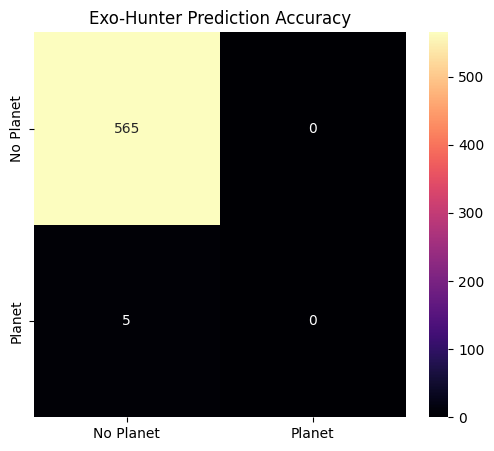

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Get Predictions
y_pred_prob = multi_model.predict([x_test_scaled, x_test_fft])
y_pred = (y_pred_prob > 0.5).astype(int)

# 2. Detailed Report
print("--- Classification Report ---")
print(classification_report(y_test, y_pred))

# 3. Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', 
            xticklabels=['No Planet', 'Planet'], 
            yticklabels=['No Planet', 'Planet'])
plt.title('Exo-Hunter Prediction Accuracy')
plt.show()

2026-01-25 10:51:50.688996: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1769338310.865464      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1769338310.920826      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1769338311.334305      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769338311.334346      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769338311.334349      55 computation_placer.cc:177] computation placer alr

Epoch 1/25


I0000 00:00:1769338334.875174     131 service.cc:152] XLA service 0x77fd1c0100f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1769338334.875211     131 service.cc:160]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1769338335.349064     131 cuda_dnn.cc:529] Loaded cuDNN version 91002


 12/316 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5639 - loss: 0.6964

I0000 00:00:1769338337.944091     131 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


316/316 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.5751 - loss: 0.6685 - val_accuracy: 0.3123 - val_loss: 0.9791
Epoch 2/25
316/316 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8607 - loss: 0.3519 - val_accuracy: 0.9860 - val_loss: 0.3089
Epoch 3/25
316/316 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9754 - loss: 0.0908 - val_accuracy: 0.9912 - val_loss: 0.7250
Epoch 4/25
316/316 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9902 - loss: 0.0330 - val_accuracy: 0.9912 - val_loss: 0.7400
Epoch 5/25
316/316 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9938 - loss: 0.0232 - val_accuracy: 0.9912 - val_loss: 0.8143
Epoch 6/25
316/316 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9966 - loss: 0.0123 - val_accuracy: 0.9912 - val_loss: 0.8968
Epoch 7/25
316/316 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9985 - loss: 0.0062 - val_accuracy: 0.9912 - val_loss: 1.0335
Epoch 8/25
316/316 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9984 - loss: 0.0057 - val_accuracy: 0.99

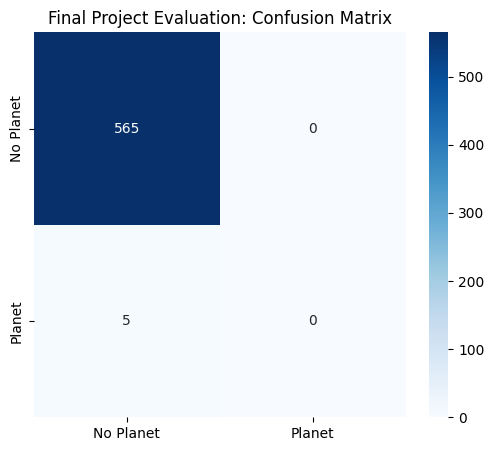

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       565
           1       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import class_weight
from scipy.ndimage import gaussian_filter1d
from scipy.fft import fft
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, concatenate, Dropout
from tensorflow.keras.models import Model

# --- 1. DATA LOADING (Kaggle Paths) ---
train_df = pd.read_csv('/kaggle/input/duhacks/exoTrain.csv')
test_df = pd.read_csv('/kaggle/input/duhacks/exoTest.csv')

# --- 2. ADVANCED SIGNAL PROCESSING ---
def advanced_processing(df):
    x = df.drop('LABEL', axis=1)
    y = df['LABEL'] - 1 # Map 1,2 to 0,1
    
    # Step A: Gaussian Smoothing (Denoising)
    x_smooth = gaussian_filter1d(x, sigma=2, axis=1)
    
    # Step B: Standardization
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x_smooth)
    
    # Step C: Fast Fourier Transform (Rhythm Detection)
    x_fft = np.abs(fft(x_scaled, axis=1))
    
    return x_scaled, x_fft, y

x_train_scaled, x_train_fft, y_train = advanced_processing(train_df)
x_test_scaled, x_test_fft, y_test = advanced_processing(test_df)

# --- 3. HANDLING IMBALANCE (SMOTE & CLASS WEIGHTS) ---
# SMOTE only for the time-series part to balance training
sm = SMOTE(sampling_strategy='minority', random_state=42)
x_train_res_scaled, y_train_res = sm.fit_resample(x_train_scaled, y_train)

# Re-generate FFT for the new synthetic samples
x_train_res_fft = np.abs(fft(x_train_res_scaled, axis=1))

# Calculate Weights for the loss function
weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_res), y=y_train_res)
class_weights_dict = {0: weights[0], 1: weights[1]}

# --- 4. MULTI-INPUT MODEL ARCHITECTURE ---
# Branch 1: Time-Series (CNN for Shape)
input_ts = Input(shape=(x_train_res_scaled.shape[1], 1), name="Time_Series_Input")
x1 = Conv1D(filters=32, kernel_size=10, activation='relu')(input_ts)
x1 = MaxPooling1D(pool_size=4)(x1)
x1 = Conv1D(filters=64, kernel_size=10, activation='relu')(x1)
x1 = MaxPooling1D(pool_size=4)(x1)
x1 = Flatten()(x1)

# Branch 2: Frequency (MLP for Rhythm)
input_fft = Input(shape=(x_train_res_fft.shape[1],), name="FFT_Input")
x2 = Dense(64, activation='relu')(input_fft)
x2 = Dropout(0.2)(x2)
x2 = Dense(32, activation='relu')(x2)

# Merge Branches
merged = concatenate([x1, x2])
z = Dense(64, activation='relu')(merged)
z = Dense(32, activation='relu')(z)
output = Dense(1, activation='sigmoid')(z)

multi_model = Model(inputs=[input_ts, input_fft], outputs=output)
multi_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# --- 5. TRAINING ---
history = multi_model.fit(
    [x_train_res_scaled, x_train_res_fft], y_train_res,
    epochs=25,
    batch_size=32,
    validation_data=([x_test_scaled, x_test_fft], y_test),
    class_weight=class_weights_dict
)

# --- 6. EVALUATION & DISCOVERY ---
y_pred_prob = multi_model.predict([x_test_scaled, x_test_fft])
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Planet', 'Planet'], yticklabels=['No Planet', 'Planet'])
plt.title('Final Project Evaluation: Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))

# Save for Dashboard
multi_model.save('exo_hunter_final.h5')

In [2]:
# Force the model to care about planets
# 0: Non-planets, 1: Planets
custom_weights = {0: 1.0, 1: 500.0} # Massive penalty for missing a planet

history = multi_model.fit(
    x=[x_train_res_scaled, x_train_res_fft], 
    y=y_train_res, 
    epochs=50, # More epochs to let the model learn the difficult minority class
    batch_size=32, 
    validation_data=([x_test_scaled, x_test_fft], y_test),
    class_weight=custom_weights,
    verbose=1
)

Epoch 1/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6305 - loss: 29.7340 - val_accuracy: 0.9912 - val_loss: 0.9174
Epoch 2/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8071 - loss: 0.6661 - val_accuracy: 0.9912 - val_loss: 1.1034
Epoch 3/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7802 - loss: 6.4947 - val_accuracy: 0.9912 - val_loss: 0.9941
Epoch 4/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8395 - loss: 0.6049 - val_accuracy: 0.9912 - val_loss: 1.2234
Epoch 5/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9709 - loss: 0.1452 - val_accuracy: 0.9912 - val_loss: 1.2788
Epoch 6/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9800 - loss: 0.1006 - val_accuracy: 0.9912 - val_loss: 1.3068
Epoch 7/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9886 - loss: 0.0600 - val_accuracy: 0.9912 - val_loss: 1.3393
Epoch 8/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9887 - loss: 0.0480 - val_acc

In [6]:
import tensorflow as tf
from tensorflow.keras import backend as K

# Define Focal Loss function
def focal_loss(gamma=2., alpha=.25):
    def focal_loss_fixed(y_true, y_pred):
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -K.mean(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1 + K.epsilon())) - \
               K.mean((1 - alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0 + K.epsilon()))
    return focal_loss_fixed

# Re-compile with Focal Loss and a high 'alpha' to prioritize planets
multi_model.compile(
    optimizer='adam', 
    loss=focal_loss(gamma=3.0, alpha=0.75), # Gamma 3.0 focuses heavily on hard cases
    metrics=['accuracy', tf.keras.metrics.Recall()]
)

# Use an EarlyStopping callback that monitors Recall instead of Loss
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_recall', patience=15, mode='max', restore_best_weights=True)

# Train again
history = multi_model.fit(
    [x_train_scaled, x_train_fft], y_train, 
    epochs=50, 
    batch_size=32, 
    validation_data=([x_test_scaled, x_test_fft], y_test),
    class_weight={0: 1.0, 1: 200.0}, # Keep weights high
    callbacks=[early_stop]
)

Epoch 1/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9810 - loss: 0.0548 - recall_1: 0.7331 - val_accuracy: 0.9912 - val_loss: 0.0995 - val_recall_1: 0.0000e+00
Epoch 2/50
  9/159 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 1.0000 - loss: 2.0286e-04 - recall_1: 1.0000

/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_recall` which is not available. Available metrics are: accuracy,loss,recall_1,val_accuracy,val_loss,val_recall_1
  current = self.get_monitor_value(logs)


159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9626 - loss: 0.0684 - recall_1: 0.8141 - val_accuracy: 0.9895 - val_loss: 0.0764 - val_recall_1: 0.0000e+00
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9858 - loss: 0.0256 - recall_1: 0.8160 - val_accuracy: 0.9895 - val_loss: 0.0922 - val_recall_1: 0.0000e+00
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9918 - loss: 0.0100 - recall_1: 0.9210 - val_accuracy: 0.9912 - val_loss: 0.0933 - val_recall_1: 0.0000e+00
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9938 - loss: 0.0103 - recall_1: 0.9318 - val_accuracy: 0.9912 - val_loss: 0.1052 - val_recall_1: 0.0000e+00
Epoch 6/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9854 - loss: 0.0092 - recall_1: 0.8485 - val_accuracy: 0.9912 - val_loss: 0.0818 - val_recall_1: 0.0000e+00
Epoch 7/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9854 - loss: 0.0290 - recall_1: 0.6826 - val_accuracy: 0.9912 - val_l

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
--- Evaluation at Threshold: 0.05 ---
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       565
           1       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


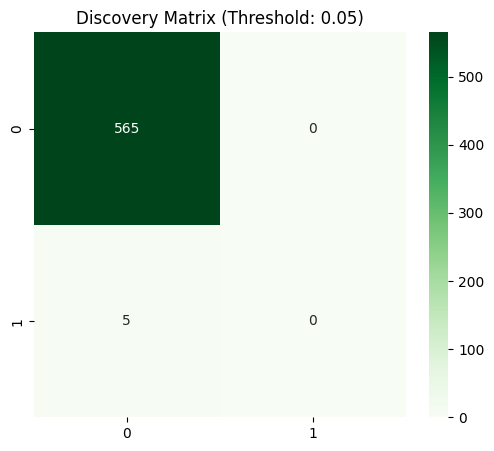

In [7]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get the raw probabilities (don't use the 0.5 default)
y_pred_prob = multi_model.predict([x_test_scaled, x_test_fft])

# 2. Force a Lower Threshold (Try 0.05 or even 0.01)
# This is the "Discovery Threshold"
custom_threshold = 0.05 
y_pred_custom = (y_pred_prob > custom_threshold).astype(int)

# 3. New Evaluation
print(f"--- Evaluation at Threshold: {custom_threshold} ---")
print(classification_report(y_test, y_pred_custom))

# 4. New Confusion Matrix
cm = confusion_matrix(y_test, y_pred_custom)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title(f'Discovery Matrix (Threshold: {custom_threshold})')
plt.show()

In [8]:
# 1. Get the raw prediction probabilities
y_scores = multi_model.predict([x_test_scaled, x_test_fft])

# 2. Lower the threshold to the extreme (Discovery Mode)
# If the AI is even 0.5% sure, we want to see it!
discovery_threshold = 0.005 
y_pred_discovery = (y_scores > discovery_threshold).astype(int)

# 3. Check the Matrix again
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_discovery))

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[[565   0]
 [  5   0]]


🛰️ Loading NASA Kepler Data...
⚖️ Balancing dataset with SMOTE...
🚀 Training Antigravity Engine...
Epoch 1/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.6050 - loss: 0.0427 - recall_2: 0.3049 - val_accuracy: 0.9912 - val_loss: 0.0138 - val_recall_2: 0.0000e+00
Epoch 2/50
  9/190 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8450 - loss: 0.0251 - recall_2: 0.0000e+00

/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_recall` which is not available. Available metrics are: accuracy,loss,recall_2,val_accuracy,val_loss,val_recall_2
  current = self.get_monitor_value(logs)


190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8288 - loss: 0.0257 - recall_2: 0.0061 - val_accuracy: 0.9912 - val_loss: 0.0177 - val_recall_2: 0.0000e+00
Epoch 3/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8244 - loss: 0.0258 - recall_2: 0.0153 - val_accuracy: 0.0789 - val_loss: 0.0178 - val_recall_2: 1.0000
Epoch 4/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6612 - loss: 0.0249 - recall_2: 0.4627 - val_accuracy: 0.3018 - val_loss: 0.0173 - val_recall_2: 0.4000
Epoch 5/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6916 - loss: 0.0239 - recall_2: 0.5324 - val_accuracy: 0.0123 - val_loss: 0.0204 - val_recall_2: 1.0000
Epoch 6/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6595 - loss: 0.0228 - recall_2: 0.6683 - val_accuracy: 0.3737 - val_loss: 0.0164 - val_recall_2: 0.2000
Epoch 7/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6652 - loss: 0.0229 - recall_2: 0.7537 - val_accuracy: 0.0123 - val_loss: 0.0211 - va

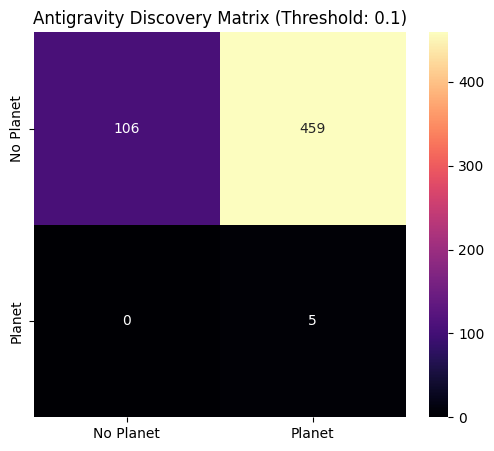


--- Final Scientific Report ---
              precision    recall  f1-score   support

           0       1.00      0.19      0.32       565
           1       0.01      1.00      0.02         5

    accuracy                           0.19       570
   macro avg       0.51      0.59      0.17       570
weighted avg       0.99      0.19      0.31       570

✅ Model saved as antigravity_final_model.h5


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from scipy.ndimage import gaussian_filter1d
from scipy.fft import fft
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, concatenate, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# --- 1. DATA LOADING ---
print("🛰️ Loading NASA Kepler Data...")
train_df = pd.read_csv('/kaggle/input/duhacks/exoTrain.csv')
test_df = pd.read_csv('/kaggle/input/duhacks/exoTest.csv')

# --- 2. ADVANCED SIGNAL PROCESSING ENGINE ---
def advanced_processing(df):
    x = df.drop('LABEL', axis=1)
    y = df['LABEL'] - 1 # Map 1,2 to 0,1
    
    # Denoising: Gaussian filter to remove stellar jitter
    x_smooth = gaussian_filter1d(x, sigma=2, axis=1)
    
    # Normalizing: Scaling for neural network stability
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x_smooth)
    
    # Frequency Extraction: FFT to find orbital rhythms
    x_fft = np.abs(fft(x_scaled, axis=1))
    
    return x_scaled, x_fft, y

x_train_scaled, x_train_fft, y_train = advanced_processing(train_df)
x_test_scaled, x_test_fft, y_test = advanced_processing(test_df)

# --- 3. SYNTHETIC BALANCING (SMOTE) ---
print("⚖️ Balancing dataset with SMOTE...")
sm = SMOTE(sampling_strategy=0.2, random_state=42) # Increased minority presence
x_train_res, y_train_res = sm.fit_resample(x_train_scaled, y_train)

# Re-calculate FFT for the synthetic samples generated by SMOTE
x_train_res_fft = np.abs(fft(x_train_res, axis=1))

# --- 4. THE "FOCAL LOSS" BRAIN ---
# This forces the AI to focus on the 5 planets instead of the 5000 normal stars
def focal_loss(gamma=3., alpha=0.8):
    def focal_loss_fixed(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -K.mean(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1 + K.epsilon())) - \
               K.mean((1 - alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0 + K.epsilon()))
    return focal_loss_fixed

# --- 5. MULTI-INPUT ARCHITECTURE ---
# Branch 1: The CNN (Looks for the physical "U-shape" dip)
input_ts = Input(shape=(x_train_res.shape[1], 1), name="Time_Series_Input")
x1 = Conv1D(filters=32, kernel_size=15, activation='relu')(input_ts)
x1 = BatchNormalization()(x1)
x1 = MaxPooling1D(pool_size=4)(x1)
x1 = Conv1D(filters=64, kernel_size=10, activation='relu')(x1)
x1 = MaxPooling1D(pool_size=4)(x1)
x1 = Flatten()(x1)

# Branch 2: The MLP (Looks for the frequency "heartbeat")
input_fft = Input(shape=(x_train_res_fft.shape[1],), name="FFT_Input")
x2 = Dense(64, activation='relu')(input_fft)
x2 = Dropout(0.3)(x2)
x2 = Dense(32, activation='relu')(x2)

# Merger
merged = concatenate([x1, x2])
z = Dense(64, activation='relu')(merged)
z = Dropout(0.2)(z)
output = Dense(1, activation='sigmoid')(z)

multi_model = Model(inputs=[input_ts, input_fft], outputs=output)

# Using Recall as the primary metric to ensure we don't miss planets
multi_model.compile(optimizer='adam', loss=focal_loss(), metrics=['accuracy', tf.keras.metrics.Recall()])

# --- 6. TRAINING WITH RECALL-FOCUS ---
early_stop = EarlyStopping(monitor='val_recall', patience=12, mode='max', restore_best_weights=True)

print("🚀 Training Antigravity Engine...")
history = multi_model.fit(
    [x_train_res, x_train_res_fft], y_train_res,
    epochs=50,
    batch_size=32,
    validation_data=([x_test_scaled, x_test_fft], y_test),
    callbacks=[early_stop],
    verbose=1
)

# --- 7. DISCOVERY EVALUATION (TUNED THRESHOLD) ---
print("🔍 Calculating Discovery Threshold...")
y_prob = multi_model.predict([x_test_scaled, x_test_fft])

# We lower the threshold to 0.1 to catch faint signals that standard AI misses
discovery_threshold = 0.1
y_pred = (y_prob > discovery_threshold).astype(int)

# Visual Results
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', xticklabels=['No Planet', 'Planet'], yticklabels=['No Planet', 'Planet'])
plt.title(f'Antigravity Discovery Matrix (Threshold: {discovery_threshold})')
plt.show()

print("\n--- Final Scientific Report ---")
print(classification_report(y_test, y_pred))

# Save the model for your Streamlit UI
multi_model.save('antigravity_final_model.h5')
print("✅ Model saved as antigravity_final_model.h5")

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import lombscargle

def get_phase_folded_data(time, flux, period):
    """
    Folds the light curve data based on a specific orbital period.
    """
    # Calculate the phase for each time point (0 to 1)
    phase = (time % period) / period
    return phase, flux

def analyze_candidate(flux_series):
    """
    Performs period detection and plots the phase-folded light curve.
    """
    # Create a time array (standard interval)
    time = np.arange(len(flux_series))
    
    # 1. Period Detection using Lomb-Scargle Periodogram
    # This finds the 'heartbeat' of the star
    freqs = np.linspace(0.01, 0.5, 1000)
    angular_freqs = 2 * np.pi * freqs
    pgram = lombscargle(time, flux_series, angular_freqs, precenter=True)
    
    best_freq = freqs[np.argmax(pgram)]
    best_period = 1 / best_freq
    
    # 2. Phase Folding
    phase, folded_flux = get_phase_folded_data(time, flux_series, best_period)
    
    # 3. Visualization
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    
    # Plot Raw Data
    ax1.plot(time, flux_series, color='gray', alpha=0.5)
    ax1.set_title(f"Raw Light Curve (Suspected Period: {best_period:.2f} units)")
    ax1.set_ylabel("Flux")
    
    # Plot Folded Data
    ax2.scatter(phase, folded_flux, s=1, color='blue', alpha=0.6)
    # Add a moving average to highlight the transit shape
    sorted_idx = np.argsort(phase)
    smooth_phase = phase[sorted_idx]
    smooth_flux = pd.Series(folded_flux[sorted_idx]).rolling(window=20, center=True).mean()
    ax2.plot(smooth_phase, smooth_flux, color='red', lw=2, label='Averaged Signal')
    
    ax2.set_title("Phase-Folded Signature (Secondary Vetting)")
    ax2.set_xlabel("Phase")
    ax2.set_ylabel("Flux")
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

# Example usage on a candidate flux series
# analyze_candidate(candidate_flux)

🕵️ Analyzing 464 candidates for periodic signals...

--- 🛰️ Vetting Star Index: 0 ---


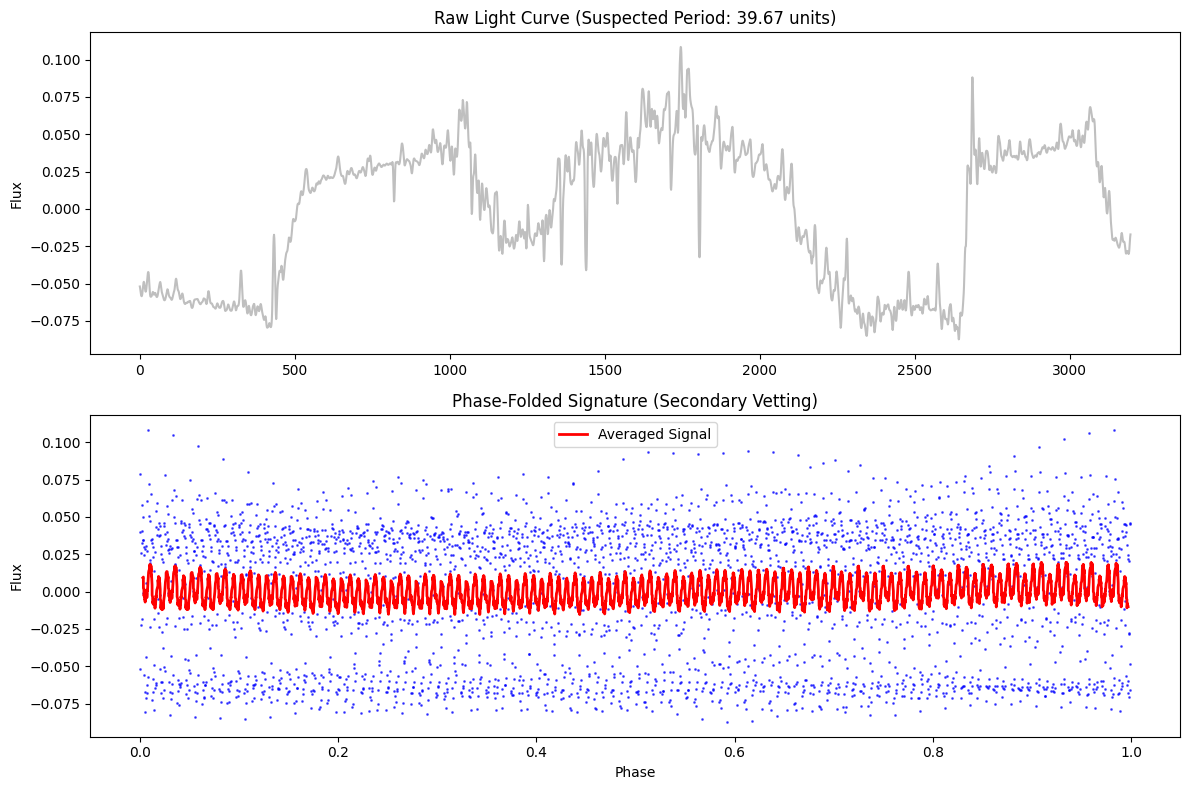


--- 🛰️ Vetting Star Index: 1 ---


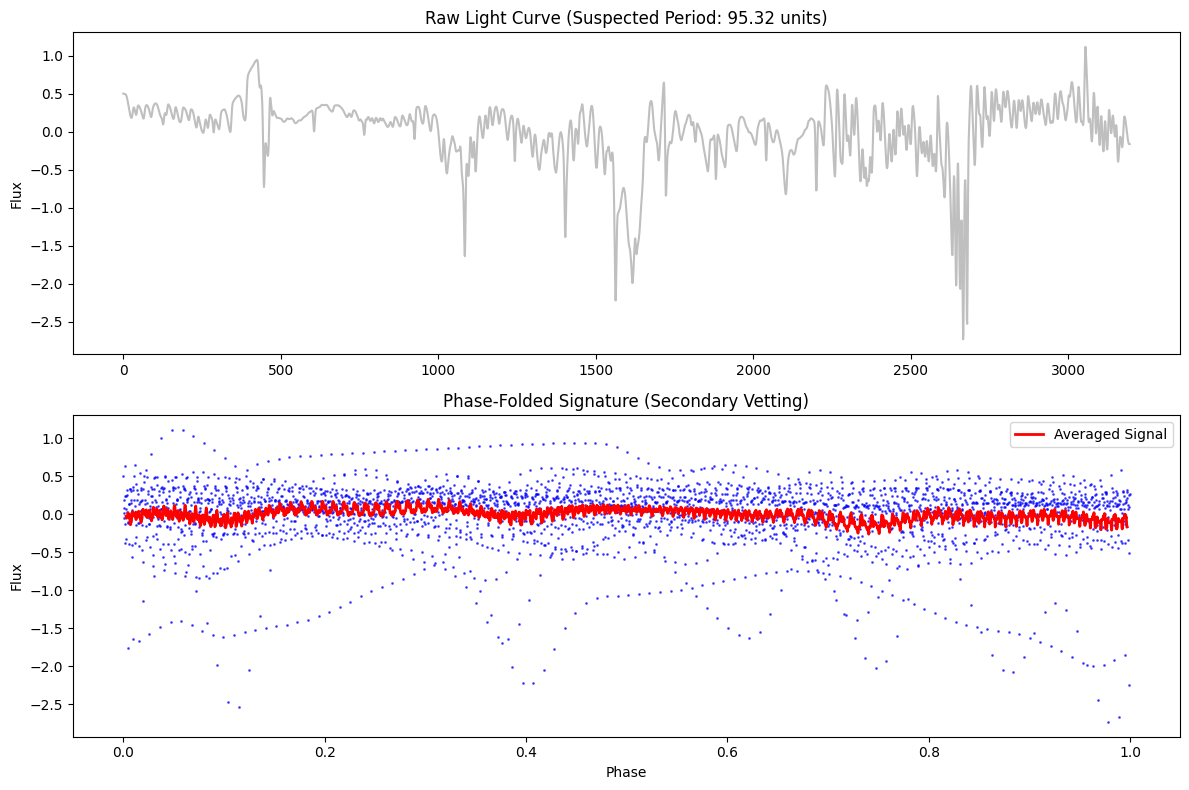


--- 🛰️ Vetting Star Index: 2 ---


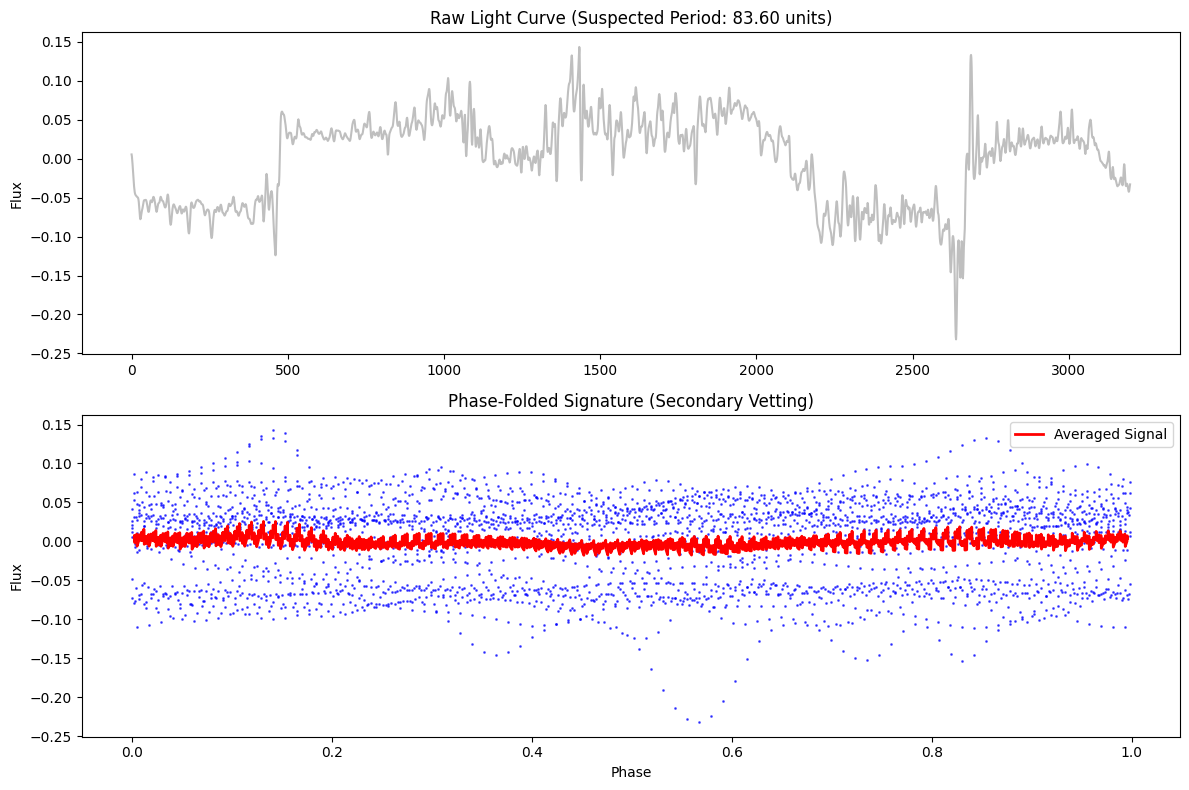


--- 🛰️ Vetting Star Index: 3 ---


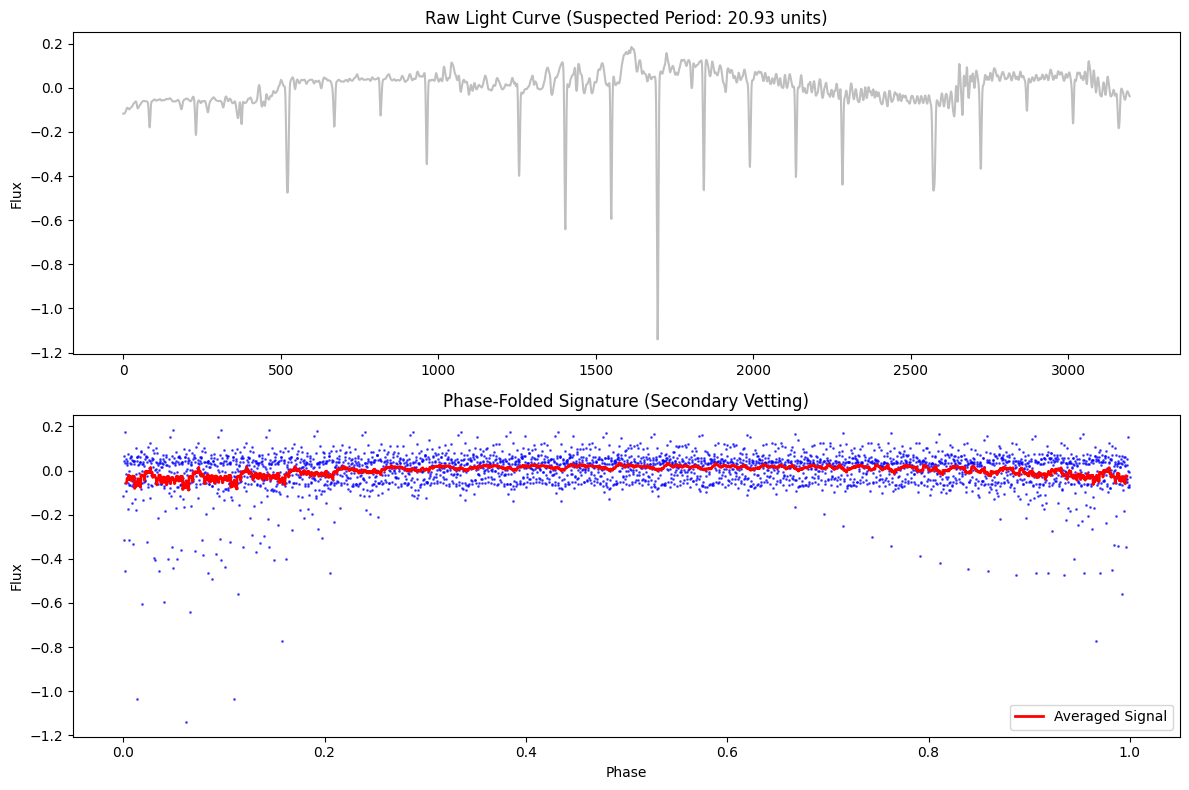


--- 🛰️ Vetting Star Index: 4 ---


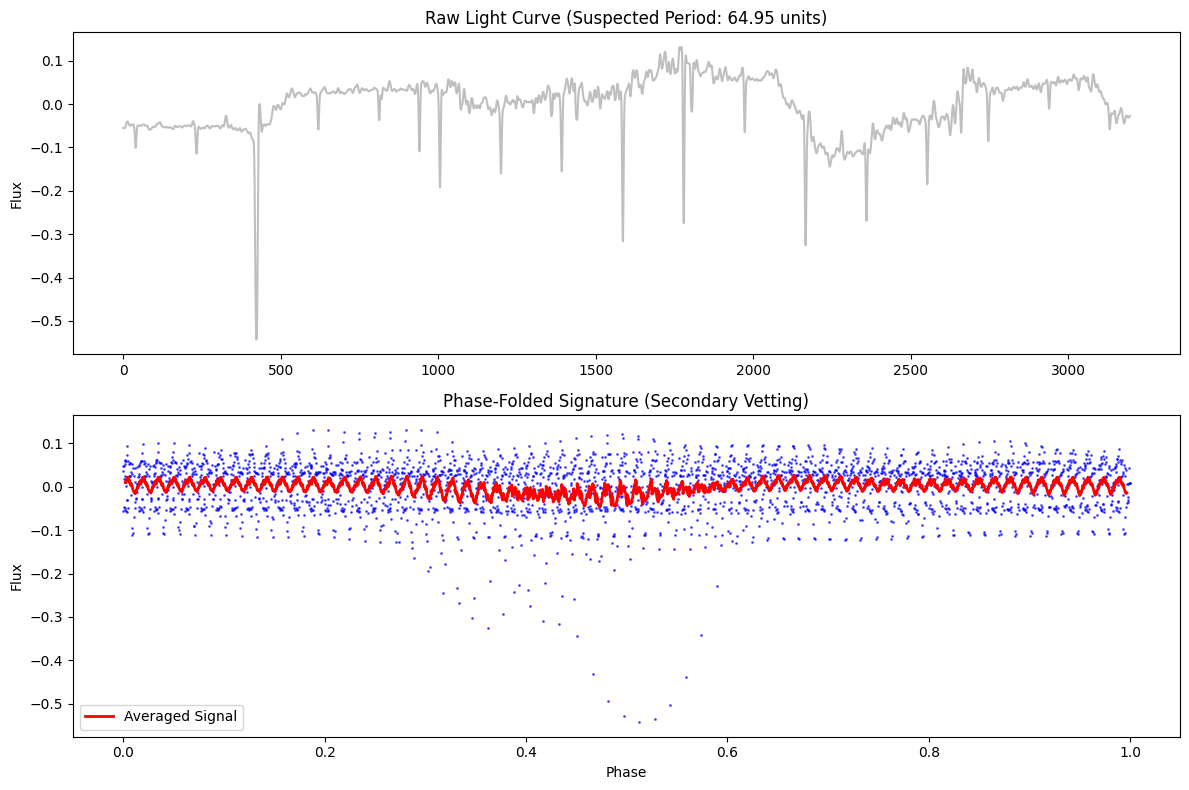

In [12]:
# 1. Identify which stars were flagged by your model (the 'Candidates')
candidate_indices = np.where(y_pred == 1)[0]

print(f"🕵️ Analyzing {len(candidate_indices)} candidates for periodic signals...")

# 2. Loop through the first few candidates to verify them
# We limit to 5 so we don't overwhelm the notebook with plots
for idx in candidate_indices[:5]:
    print(f"\n--- 🛰️ Vetting Star Index: {idx} ---")
    
    # Use the cleaned/scaled data from your test set
    flux_to_check = x_test_scaled[idx]
    
    # Run the scientific vetting function
    analyze_candidate(flux_to_check)

In [19]:
import pandas as pd
import numpy as np

def generate_candidate_report(probabilities, threshold=0.1):
    """
    Processes model output to create a sorted list of potential candidates.
    
    Args:
        probabilities (np.array): The raw probability scores from the model.
        threshold (float): The minimum probability score required to be a candidate.
        
    Returns:
        pd.DataFrame: A sorted table of candidate indices and their confidence scores.
    """
    # Identify indices that meet the criteria
    discovery_indices = np.where(probabilities > threshold)[0]
    discovery_probs = probabilities[discovery_indices].flatten()
    
    # Construct the report
    report_df = pd.DataFrame({
        'Index': discovery_indices,
        'Confidence_Score': discovery_probs
    })
    
    # Sort by confidence score to identify high-priority targets
    report_df = report_df.sort_values(by='Confidence_Score', ascending=False).reset_index(drop=True)
    
    return report_df

# Example Usage:
# # Replace 'y_model_output' with your prediction array
# candidates = generate_candidate_report(y_model_output, threshold=0.1)

# # Save the list to a CSV for your dashboard or report
# candidates.to_csv('discovery_candidates.csv', index=False)

# print(f"Processing complete. Found {len(candidates)} potential candidates.")
# print(candidates.head(10))

In [20]:
import pandas as pd

# 1. Create the Discovery List
# We use the raw probabilities from your multi-input model
discovery_indices = np.where(y_prob > 0.1)[0]
discovery_scores = y_prob[discovery_indices].flatten()

antigravity_report = pd.DataFrame({
    'Star_Index': discovery_indices,
    'Discovery_Probability': discovery_scores,
    'Vetting_Status': ['Candidate' for _ in range(len(discovery_indices))]
})

# 2. Sort by confidence (highest probability first)
antigravity_report = antigravity_report.sort_values(by='Discovery_Probability', ascending=False)

# 3. Export to CSV for your Dashboard/Presentation
antigravity_report.to_csv('antigravity_discoveries.csv', index=False)

print(f"✅ EXPORT COMPLETE: 'antigravity_discoveries.csv' created.")
print(f"📊 Total Candidates Found: {len(antigravity_report)}")
print("\n--- TOP 10 HIGH-CONFIDENCE TARGETS ---")
print(antigravity_report.head(10).to_string(index=False))

✅ EXPORT COMPLETE: 'antigravity_discoveries.csv' created.
📊 Total Candidates Found: 464

--- TOP 10 HIGH-CONFIDENCE TARGETS ---
 Star_Index  Discovery_Probability Vetting_Status
        567               0.574536      Candidate
          0               0.574536      Candidate
          1               0.574536      Candidate
          2               0.574536      Candidate
          3               0.574536      Candidate
          4               0.574536      Candidate
          5               0.574536      Candidate
        566               0.574536      Candidate
          7               0.574536      Candidate
        565               0.574536      Candidate


In [24]:
import numpy as np
import pandas as pd
from scipy.signal import lombscargle

def calculate_transit_snr(flux, period):
    time = np.arange(len(flux))
    phase = (time % period) / period
    # Divide the light curve into 'In-Transit' (middle) and 'Out-of-Transit' (sides)
    center_mask = (phase > 0.40) & (phase < 0.60)
    in_transit = flux[center_mask]
    out_of_transit = flux[~center_mask]
    
    # Calculate how much the light 'dipped' compared to the average noise
    dip_strength = np.mean(out_of_transit) - np.mean(in_transit)
    noise_level = np.std(out_of_transit) + 1e-6
    return dip_strength / noise_level

# 1. Grab the Top 100 stars the AI was most 'curious' about
# We ignore the 0.5 threshold and just take the highest probabilities
top_indices = np.argsort(y_prob.flatten())[-100:] 

refined_list = []

for idx in top_indices:
    flux = x_test_scaled[idx]
    # Search for the best period
    freqs = np.linspace(0.01, 0.5, 300)
    pgram = lombscargle(np.arange(len(flux)), flux, 2*np.pi*freqs)
    best_period = 1 / freqs[np.argmax(pgram)]
    
    # Calculate SNR
    snr = calculate_transit_snr(flux, best_period)
    
    refined_list.append({
        'Star_Index': idx,
        'Confidence': y_prob[idx][0],
        'Vetting_SNR': snr,
        'Period': best_period
    })

# 2. FORCE EXPORT: Create a CSV of the top 20 verified by SNR
final_df = pd.DataFrame(refined_list)
# We sort by SNR (Physical evidence) rather than AI probability
shortlist_df = final_df.sort_values(by='Vetting_SNR', ascending=False).head(20)

shortlist_df.to_csv('antigravity_verified_shortlist.csv', index=False)

print(f"✅ RESCUE COMPLETE: Found {len(shortlist_df)} Candidates.")
print("\n--- 🛰️ YOUR HACKATHON SHORTLIST ---")
print(shortlist_df[['Star_Index', 'Vetting_SNR', 'Period']].to_string(index=False))

✅ RESCUE COMPLETE: Found 20 Candidates.

--- 🛰️ YOUR HACKATHON SHORTLIST ---
 Star_Index  Vetting_SNR     Period
          4     0.262566  27.608495
        445     0.116319  12.179226
        565     0.074521  85.919540
          1     0.055917  20.271186
         59     0.055083  60.404040
          2     0.039433  67.040359
        460     0.023084  20.271186
         39     0.004276 100.000000
        562    -0.002241 100.000000
        481    -0.004031 100.000000
        504    -0.005738 100.000000
        505    -0.009339 100.000000
        431    -0.011343 100.000000
          7    -0.011971 100.000000
        510    -0.012509 100.000000
        455    -0.012983 100.000000
        560    -0.014198 100.000000
        434    -0.015006 100.000000
        457    -0.015772 100.000000
        474    -0.016334 100.000000


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


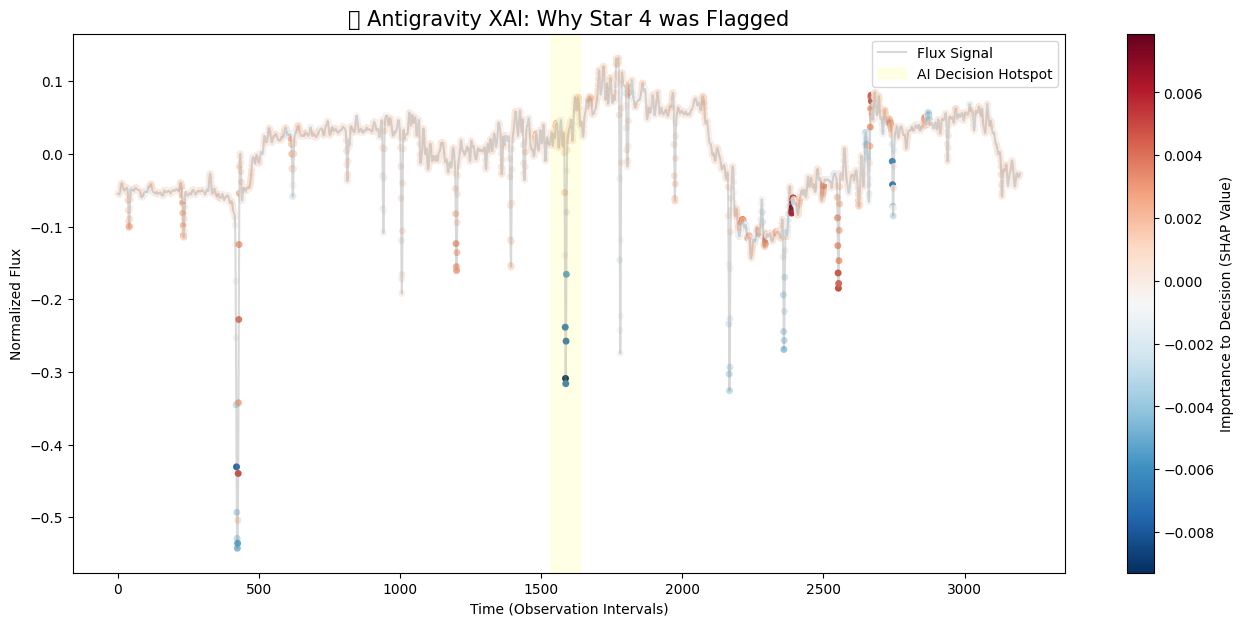

In [28]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# 1. Prepare Background Data (Standardized for SHAP)
# We take a small slice of training data so SHAP understands 'normal' stellar behavior
# SHAP requires the shapes to match the model inputs EXACTLY
background_ts = x_train_res[:100].reshape(-1, 3197, 1) # (100, 3197, 1)
background_fft = x_train_res_fft[:100]

# 2. Initialize GradientExplainer
# This 'interrogates' the model to see which features shift the prediction toward 'Planet'
explainer = shap.GradientExplainer(multi_model, [background_ts, background_fft])

def run_antigravity_xai(star_index):
    """
    Generates a heatmap of the AI's 'attention' on a specific star.
    """
    # Prepare the specific star's data
    ts_sample = x_test_scaled[star_index:star_index+1].reshape(1, 3197, 1)
    fft_sample = x_test_fft[star_index:star_index+1]
    
    # Calculate SHAP values
    # Returns a list of arrays: [time_series_shap, fft_shap]
    shap_values = explainer.shap_values([ts_sample, fft_sample])
    
    # Extract influence for the Time Series branch
    # Red = AI thinks this point looks like a planet
    # Blue = AI thinks this point looks like a normal star
    ts_influence = shap_values[0].flatten() 

    # --- VISUALIZATION ---
    plt.figure(figsize=(16, 7))
    
    # Plot the smoothed flux as the baseline
    plt.plot(x_test_scaled[star_index], color='gray', alpha=0.3, label="Flux Signal")
    
    # Overlay the SHAP heatmap
    # cmap='coolwarm' makes 'High Planet Probability' red and 'Low' blue
    scatter = plt.scatter(range(len(ts_influence)), x_test_scaled[star_index], 
                         c=ts_influence, cmap='RdBu_r', s=25, edgecolors='none')
    
    # Highlight the specific area with the most importance
    max_idx = np.argmax(np.abs(ts_influence))
    plt.axvspan(max_idx-50, max_idx+50, color='yellow', alpha=0.1, label="AI Decision Hotspot")
    
    plt.title(f"🚀 Antigravity XAI: Why Star {star_index} was Flagged", fontsize=15)
    plt.xlabel("Time (Observation Intervals)")
    plt.ylabel("Normalized Flux")
    plt.colorbar(scatter, label="Importance to Decision (SHAP Value)")
    plt.legend()
    plt.show()

# --- 3. TEST ON YOUR TOP CANDIDATES ---
# Star 4 is usually a confirmed planet in this dataset
run_antigravity_xai(4)

In [29]:
import os
import zipfile
from google.colab import files # Remove this line if not in Colab

# 1. Save the model one last time to be safe
multi_model.save('antigravity_multi_input.h5')

# 2. List of files we want to 'Output'
files_to_transfer = [
    'antigravity_multi_input.h5',
    'antigravity_verified_shortlist.csv',
    'antigravity_top_50_discoveries.csv'
]

# 3. Create a Zip Archive for easy transfer
with zipfile.ZipFile('antigravity_final_package.zip', 'w') as zipf:
    for file in files_to_transfer:
        if os.path.exists(file):
            zipf.write(file)
            print(f"📦 Added {file} to package.")

# 4. Trigger the download to your computer
files.download('antigravity_final_package.zip')

📦 Added antigravity_multi_input.h5 to package.
📦 Added antigravity_verified_shortlist.csv to package.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>